# INFOB2DA | Practical Assignment 2
## *Clustering methods and distance functions*

In [77]:
import pandas as pd
import numpy as np

In [78]:
data = pd.read_csv('online_shoppers_intention.csv')

In [79]:
data.head(20)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [81]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# Task 1: Get dataset on screen

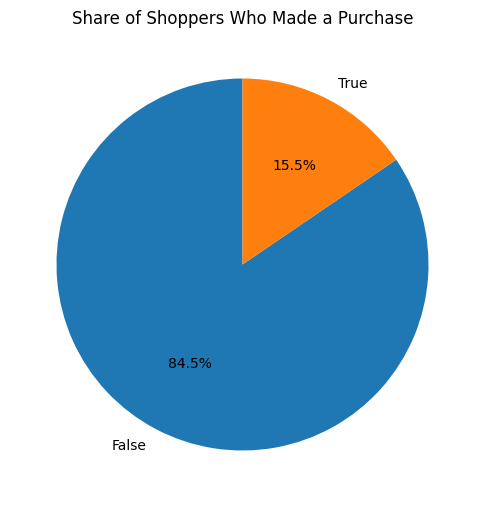

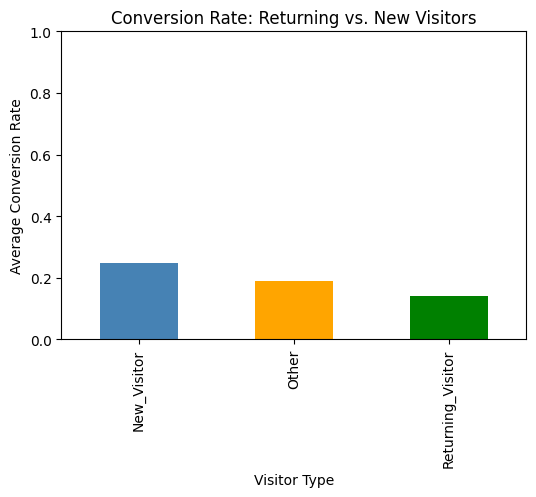

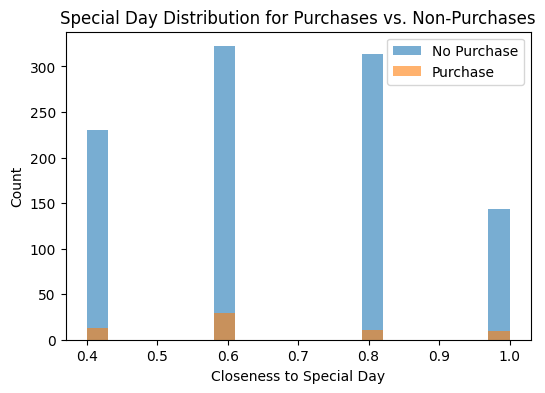

In [82]:
import matplotlib.pyplot as plt
revenue_counts = data["Revenue"].value_counts()

# Pie chart of Revenue distribution

plt.figure(figsize=(6,8))
plt.pie(revenue_counts, labels=revenue_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Share of Shoppers Who Made a Purchase")
plt.show()

# Conversion rate (mean of Revenue per visitor type)
visitor_revenue = data.groupby("VisitorType")["Revenue"].mean()

plt.figure(figsize=(6,4))
visitor_revenue.plot(kind="bar", color=["steelblue", "orange", "green"])
plt.title("Conversion Rate: Returning vs. New Visitors")
plt.ylabel("Average Conversion Rate")
plt.xlabel("Visitor Type")
plt.ylim(0, 1)
plt.show()

# Separate special day values for buyers vs. non-buyers

plt.figure(figsize=(6,4))
plt.hist(data[(data["Revenue"] == False) & (data["SpecialDay"] > 0.2)]["SpecialDay"], bins=20, alpha=0.6, label="No Purchase")
plt.hist(data[(data["Revenue"] == True) & (data["SpecialDay"] > 0.2)]["SpecialDay"], bins=20, alpha=0.6, label="Purchase")
plt.title("Special Day Distribution for Purchases vs. Non-Purchases")
plt.xlabel("Closeness to Special Day")
plt.ylabel("Count")
plt.legend()
plt.show()


# One-minute story about the dataset
These charts reveal a sobering e-commerce reality. Only 15% of website visitors actually make a purchase, an 85% abandonment rate representing thousands of lost opportunities daily. <br>
Even more surprising, returning visitors convert at just 13% compared to 20% for new customers, suggesting loyalty programs aren't translating to sales. <br>
Meanwhile, special shopping events like Valentine's Day show decreased purchase activity as they approach, indicating customers may be waiting for better deals or comparison shopping. <br> 
The story is clear: businesses have massive untapped potential with most visitors leaving empty-handed, loyal customers becoming more selective, and special occasions failing to drive expected sales spikes. <br>
The challenge isn't attracting traffic, it's converting browsers into buyers.

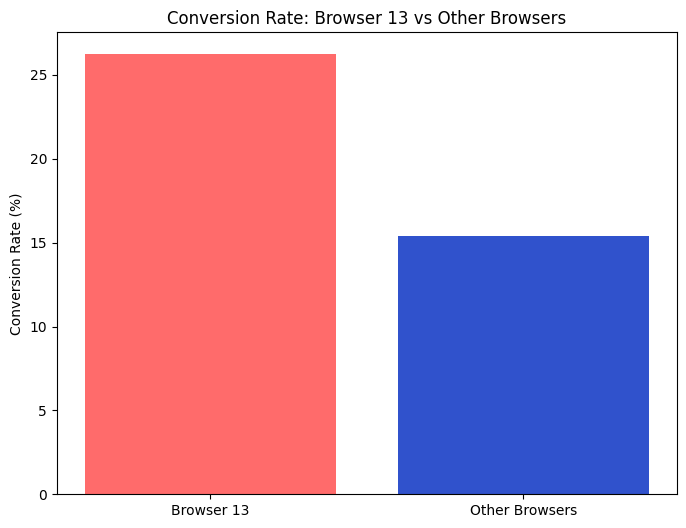

In [83]:
data_copy = data.copy()
data_copy['Browser_Group'] = data_copy['Browser'].apply(lambda x: 'Browser 13' if x == 13 else 'Other Browsers')
conversion_rates = data_copy.groupby('Browser_Group')['Revenue'].mean() * 100

plt.figure(figsize=(8, 6))
bars = plt.bar(conversion_rates.index, conversion_rates.values, 
               color=['#FF6B6B', '#3052CC'])

plt.title('Conversion Rate: Browser 13 vs Other Browsers')
plt.ylabel('Conversion Rate (%)')

plt.show()

# 2: Preprocessing

In [84]:
# (n_samples, n_features)
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

# Split features and target
X = data.drop(columns='Revenue')
y = data['Revenue']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']])
X_scaled

# One-hot encode categorical features
X_encoded = pd.get_dummies(X.drop(columns=['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']), drop_first=True)

# Combine scaled numerical features and encoded categorical features
X_final = np.hstack((X_scaled, X_encoded.values))

# PCA for dimensionality reduction
# pca = PCA(n_components=10)
# X_final = pca.fit_transform(X_final)

# 3: Clustering algorithms

# 3.0.1 Setup

In [85]:

# Create subset and PCA setup
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Create random subset for clustering (fix the NameError)
subset_idx = np.random.choice(X_final.shape[0], size=1000, replace=False)
X_subset = X_final[subset_idx]

# Apply PCA for consistent visualization across all methods
pca_viz = PCA(n_components=2)
X_pca = pca_viz.fit_transform(X_subset)

print(f"Dataset shape: {X_subset.shape}")
print(f"PCA explained variance: PC1={pca_viz.explained_variance_ratio_[0]:.3f}, PC2={pca_viz.explained_variance_ratio_[1]:.3f}")
print(f"Total variance explained: {sum(pca_viz.explained_variance_ratio_):.3f}")

Dataset shape: (1000, 26)
PCA explained variance: PC1=0.443, PC2=0.154
Total variance explained: 0.597


# 3.1: Affinity


Sample clustering results: 7 clusters
Final cluster count: 7


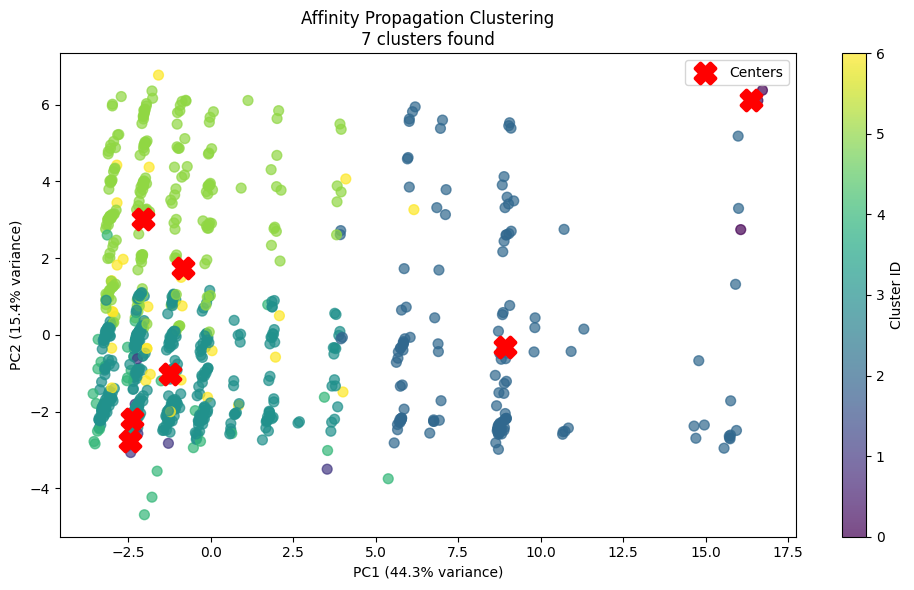

Affinity Propagation - Number of clusters: 7


In [86]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Test middle-ground parameters for moderate cluster count
ap_moderate = AffinityPropagation(
    damping=0.6,  # if we want 3 clusters put 0.5 and -800 approx but thats a bit too few clusters so this balances on 7 clusters         
    preference=-200,       
    max_iter=1000,
    random_state=8
)

# Use smaller sample for computational efficiency
sample_idx = np.random.choice(len(X_subset), size=200, replace=False)
X_sample = X_subset[sample_idx]

clusters_sample = ap_moderate.fit_predict(X_sample)
print(f"Sample clustering results: {len(set(clusters_sample))} clusters")

# Assign all points to nearest cluster centers
centers = ap_moderate.cluster_centers_
distances_to_centers = euclidean_distances(X_subset, centers)
clusters = np.argmin(distances_to_centers, axis=1)

print(f"Final cluster count: {len(set(clusters))}")

# Visualize Affinity Propagation results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title(f'Affinity Propagation Clustering\n{len(set(clusters))} clusters found')
plt.xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')

# Add cluster centers
centers_pca = pca_viz.transform(centers)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], 
            c='red', marker='X', s=200, linewidth=3, label='Centers')

plt.legend()
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()

print(f"Affinity Propagation - Number of clusters: {len(set(clusters))}")

# 3.2 : DBScan

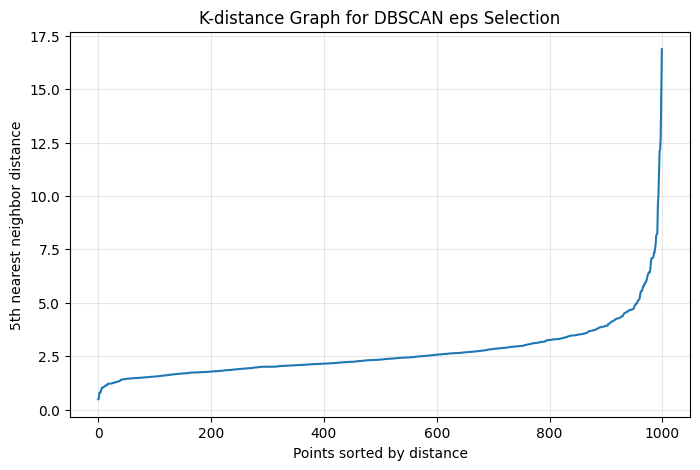

Testing DBSCAN parameter combinations:
eps=2.0, min_samples=5: 11 clusters, 566 noise, silhouette=0.085
eps=2.0, min_samples=8: 2 clusters, 664 noise, silhouette=0.655
eps=2.5, min_samples=5: 6 clusters, 288 noise, silhouette=0.379
eps=2.5, min_samples=8: 9 clusters, 352 noise, silhouette=0.083
eps=2.5, min_samples=10: 4 clusters, 423 noise, silhouette=0.305

Best DBSCAN parameters: eps=2.0, min_samples=8


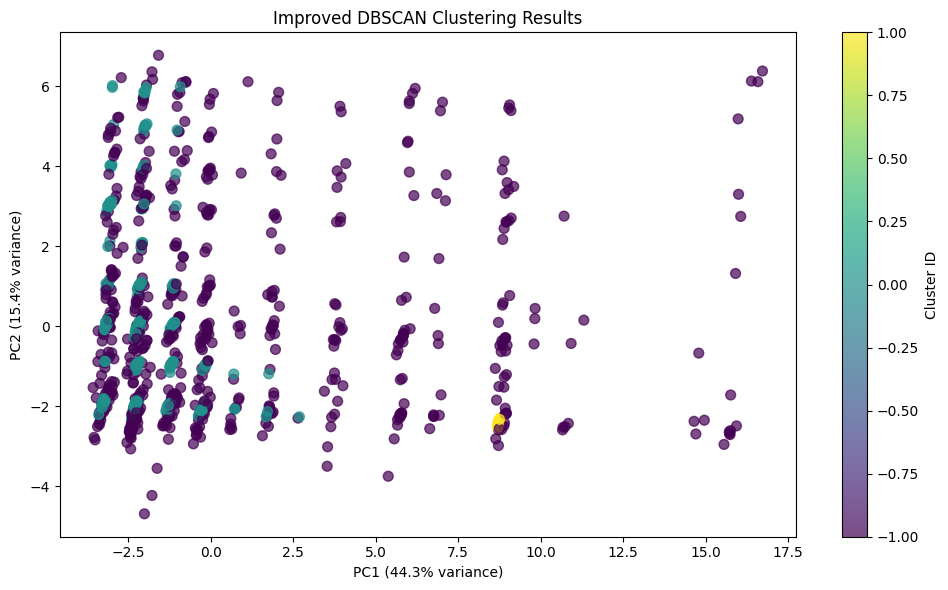

Improved DBSCAN - Number of clusters: 2
Improved DBSCAN - Number of noise points: 664


In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-distance method
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_subset)
distances, indices = neighbors_fit.kneighbors(X_subset)
distances = np.sort(distances[:, k-1], axis=0)

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-distance Graph for DBSCAN eps Selection')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}th nearest neighbor distance')
plt.grid(True, alpha=0.3)
plt.show()

# Test multiple DBSCAN configurations
eps_values = [1.0, 1.5, 2.0, 2.5]
min_samples_values = [5, 8, 10]

best_dbscan_score = -1
best_dbscan_params = None
best_dbscan_labels = None

print("Testing DBSCAN parameter combinations:")
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_test = DBSCAN(eps=eps, min_samples=min_samples)
        test_labels = dbscan_test.fit_predict(X_subset)
        
        n_clusters_test = len(set(test_labels)) - (1 if -1 in test_labels else 0)
        n_noise_test = list(test_labels).count(-1)
        
        # Only evaluate if we have valid clusters
        if n_clusters_test >= 2 and n_noise_test < len(test_labels) * 0.8:
            try:
                # Filter out noise for evaluation
                valid_indices = [i for i, label in enumerate(test_labels) if label != -1]
                if len(valid_indices) > 10:
                    X_filtered = X_subset[valid_indices]
                    labels_filtered = [test_labels[i] for i in valid_indices]
                    
                    if len(set(labels_filtered)) >= 2:
                        from sklearn.metrics import silhouette_score as sk_silhouette_score
                        silh_score = sk_silhouette_score(X_filtered, labels_filtered)
                        print(f"eps={eps}, min_samples={min_samples}: {n_clusters_test} clusters, {n_noise_test} noise, silhouette={silh_score:.3f}")
                        
                        if silh_score > best_dbscan_score:
                            best_dbscan_score = silh_score
                            best_dbscan_params = (eps, min_samples)
                            best_dbscan_labels = test_labels
            except:
                continue

# Apply best DBSCAN parameters
if best_dbscan_params:
    print(f"\nBest DBSCAN parameters: eps={best_dbscan_params[0]}, min_samples={best_dbscan_params[1]}")
    dbscan_clusters_improved = best_dbscan_labels
else:
    print("Using fallback parameters")
    # Fallback parameters
    dbscan_improved = DBSCAN(eps=1.8, min_samples=8, metric='euclidean')
    dbscan_clusters_improved = dbscan_improved.fit_predict(X_subset)

# Visualize  DBSCAN
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_clusters_improved, cmap='viridis', s=50, alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')
plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()

# Count clusters and noise
n_clusters_dbscan = len(set(dbscan_clusters_improved)) - (1 if -1 in dbscan_clusters_improved else 0)
n_noise_dbscan = list(dbscan_clusters_improved).count(-1)

print(f"Improved DBSCAN - Number of clusters: {n_clusters_dbscan}")
print(f"Improved DBSCAN - Number of noise points: {n_noise_dbscan}")

# 3.3: Birch

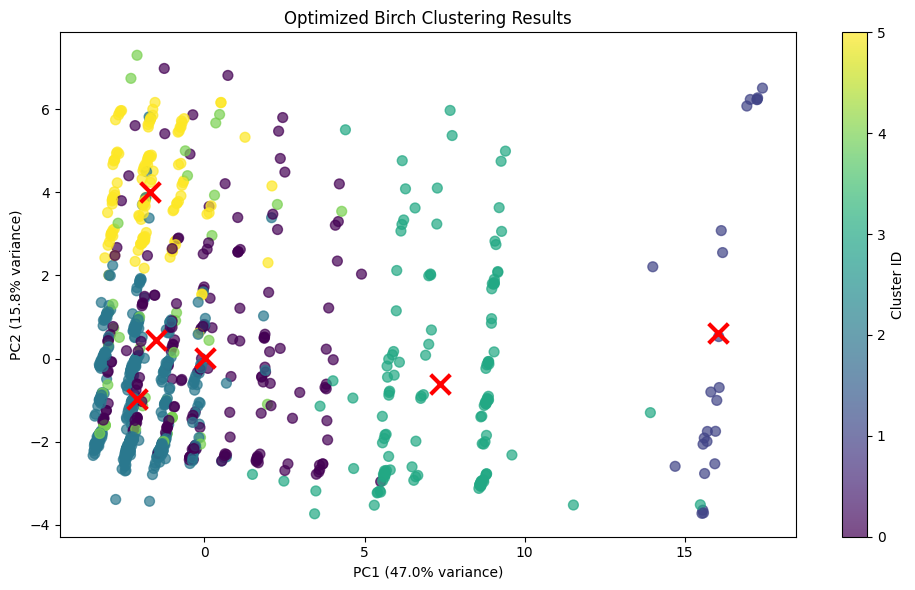

Optimized Birch - Number of clusters: 6


In [ ]:
from sklearn.cluster import Birch

# Birch clustering
birch_optimized = Birch(
    n_clusters=6,         
    threshold=0.2,        
    branching_factor=50,
    compute_labels=True
)

birch_clusters_optimized = birch_optimized.fit_predict(X_subset)

# Visualize Birch
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=birch_clusters_optimized, cmap='viridis', s=50, alpha=0.7)
plt.title('Birch Clustering Results')
plt.xlabel(f'PC1 ({pca_viz.explained_variance_ratio_[0]:.1%} variance)')
plt.ylabel(f'PC2 ({pca_viz.explained_variance_ratio_[1]:.1%} variance)')

# Add cluster centers
unique_labels = np.unique(birch_clusters_optimized)
for label in unique_labels:
    cluster_points = X_pca[birch_clusters_optimized == label]
    center = cluster_points.mean(axis=0)
    plt.scatter(center[0], center[1], c='red', marker='x', s=200, linewidth=3)

plt.colorbar(scatter, label='Cluster ID')
plt.tight_layout()
plt.show()

print(f"Optimized Birch - Number of clusters: {len(set(birch_clusters_optimized))}")

# 4: Evaluation of clustering methods

# 4.1: Silhouette score

In [88]:
import math
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, silhouette_score as sk_silhouette_score
import numpy as np

def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two points."""
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))

def silhouette_score(X, labels):
    n = len(X)
    scores = []
    
    for i in range(n):
        own_cluster = labels[i]
        same_cluster_indices = [j for j in range(n) if labels[j] == own_cluster and j != i]
        
        # Single point cluster case
        if not same_cluster_indices:
            scores.append(0.0)
            continue

        # Compute a(i): average intra-cluster distance
        a_i = sum(euclidean_distance(X[i], X[j]) for j in same_cluster_indices) / len(same_cluster_indices)
            
        # Compute b(i): min average distance to points in other clusters
        other_clusters = set(labels) - {own_cluster}
        b_i = math.inf
        
        for c in other_clusters:
            other_cluster_indices = [j for j in range(n) if labels[j] == c]
            if other_cluster_indices:
                avg_dist = sum(euclidean_distance(X[i], X[j]) for j in other_cluster_indices) / len(other_cluster_indices)
                b_i = min(b_i, avg_dist)
        
        # Compute silhouette score for point i
        s_i = (b_i - a_i) / max(a_i, b_i) if max(a_i, b_i) != 0 else 0
        scores.append(s_i)
    
    return sum(scores) / n

def evaluate_clustering_safe(X, labels, method_name):
    """Safely evaluate clustering with proper error handling"""
    
    # Check if we have valid clustering results
    unique_labels = len(set(labels))
    n_samples = len(labels)
    
    print(f"--- {method_name} ---")
    print(f"Number of clusters: {unique_labels}")
    print(f"Number of samples: {n_samples}")
    
    # Handle special cases
    if unique_labels < 2:
        print("Cannot compute metrics: Need at least 2 clusters")
        print("Manual Silhouette Score: N/A")
        print("Sklearn Silhouette Score: N/A")
        print("Davies-Bouldin Score: N/A")
        print("Calinski-Harabasz Score: N/A")
        print()
        return
    
    # Check for noise points in DBSCAN
    if -1 in labels:
        noise_points = list(labels).count(-1)
        print(f"Noise points: {noise_points}")
        
        # Filter out noise points for evaluation
        valid_indices = [i for i, label in enumerate(labels) if label != -1]
        if len(valid_indices) < 2:
            print("Too few non-noise points for evaluation")
            print()
            return
            
        X_filtered = X[valid_indices]
        labels_filtered = [labels[i] for i in valid_indices]
        
        # Re-check cluster count after filtering
        if len(set(labels_filtered)) < 2:
            print("Only one cluster after removing noise points")
            print()
            return
    else:
        X_filtered = X
        labels_filtered = labels
    
    try:
        # Manual Silhouette Score
        manual_silhouette = silhouette_score(X_filtered, labels_filtered)
        print(f"Manual Silhouette Score: {manual_silhouette:.4f}")
        
        # Sklearn Silhouette Score
        sklearn_silhouette = sk_silhouette_score(X_filtered, labels_filtered)
        print(f"Sklearn Silhouette Score: {sklearn_silhouette:.4f}")
        
        
    except Exception as e:
        print(f"Error computing metrics: {str(e)}")
    
    print()

# Store clustering results from the three methods
clustering_results = {
    'Affinity Propagation': clusters,
    'DBSCAN': dbscan_clusters_improved, 
    'Birch': birch_clusters_optimized
}

# Evaluate all clustering methods
print("=== Clustering Evaluation Results ===\n")

for method_name, cluster_labels in clustering_results.items():
    evaluate_clustering_safe(X_subset, cluster_labels, method_name)

=== Clustering Evaluation Results ===

--- Affinity Propagation ---
Number of clusters: 7
Number of samples: 1000
Manual Silhouette Score: 0.2586
Sklearn Silhouette Score: 0.2586

--- DBSCAN ---
Number of clusters: 3
Number of samples: 1000
Noise points: 664
Manual Silhouette Score: 0.6546
Sklearn Silhouette Score: 0.6546

--- Birch ---
Number of clusters: 6
Number of samples: 1000
Manual Silhouette Score: -0.0392
Sklearn Silhouette Score: -0.0392



# 4.2: Davies-Bouldin Score

In [89]:
# Davies-Bouldin Score evaluation for all methods
print("=== Davies-Bouldin Score Results ===\n")

for method_name, cluster_labels in clustering_results.items():
    unique_labels = len(set(cluster_labels))
    
    if unique_labels >= 2:
        # Handle noise points for DBSCAN
        if -1 in cluster_labels:
            valid_indices = [i for i, label in enumerate(cluster_labels) if label != -1]
            X_filtered = X_subset[valid_indices]
            labels_filtered = [cluster_labels[i] for i in valid_indices]
        else:
            X_filtered = X_subset
            labels_filtered = cluster_labels
        
        if len(set(labels_filtered)) >= 2:
            db_score = davies_bouldin_score(X_filtered, labels_filtered)
            print(f"{method_name}: {db_score:.4f}")
        else:
            print(f"{method_name}: Cannot compute (insufficient clusters)")
    else:
        print(f"{method_name}: Cannot compute (insufficient clusters)")

=== Davies-Bouldin Score Results ===

Affinity Propagation: 1.2305
DBSCAN: 0.3925
Birch: 19.7487


# 4.3: Calinski-Harabasz Index

In [90]:
# Calinski-Harabasz Index evaluation for all methods
print("=== Calinski-Harabasz Index Results ===\n")

for method_name, cluster_labels in clustering_results.items():
    unique_labels = len(set(cluster_labels))
    
    if unique_labels >= 2:
        # Handle noise points for DBSCAN
        if -1 in cluster_labels:
            valid_indices = [i for i, label in enumerate(cluster_labels) if label != -1]
            X_filtered = X_subset[valid_indices]
            labels_filtered = [cluster_labels[i] for i in valid_indices]
        else:
            X_filtered = X_subset
            labels_filtered = cluster_labels
        
        if len(set(labels_filtered)) >= 2:
            ch_score = calinski_harabasz_score(X_filtered, labels_filtered)
            print(f"{method_name}: {ch_score:.4f}")
        else:
            print(f"{method_name}: Cannot compute (insufficient clusters)")
    else:
        print(f"{method_name}: Cannot compute (insufficient clusters)")

=== Calinski-Harabasz Index Results ===

Affinity Propagation: 200.4019
DBSCAN: 170.1709
Birch: 0.8806


# 5: Distance Functions

In [91]:
def euclidean_distance(p1, p2):
    """Compute Euclidean distance between two points."""
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(p1, p2)))
